 ## CSC6621 - Final project - Team E-302
### Human activity recognition using Smartphones

The dataset includes the following files:
=========================================

- 'README.txt'

- 'features_info.txt': Shows information about the variables used on the feature vector.

- 'features.txt': List of all features.

- 'activity_labels.txt': Links the class labels with their activity name.

- 'train/X_train.txt': Training set.

- 'train/y_train.txt': Training labels.

- 'test/X_test.txt': Test set.

- 'test/y_test.txt': Test labels.

The following files are available for the train and test data. Their descriptions are equivalent. 

- 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

- 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 

- 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 

- 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

Notes: 
======
- Features are normalized and bounded within [-1,1].
- Each feature vector is a row on the text file.
- The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2).
- The gyroscope units are rad/seg.
- A video of the experiment including an example of the 6 recorded activities with one of the participants can be seen in the following link: http://www.youtube.com/watch?v=XOEN9W05_4A

In [1]:
import kagglehub
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)


c:\Users\benzshawelt\.conda\envs\kaggle\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\benzshawelt\.cache\kagglehub\datasets\uciml\human-activity-recognition-with-smartphones\versions\2


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv(path+'/train.csv')

In [4]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
from sklearn import preprocessing

In [6]:
encoder=preprocessing.LabelEncoder()

In [7]:
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)

In [8]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


In [9]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(7352,)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [11]:

# import SVC classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [12]:
svc=SVC()
svc.fit(X_train,y_train)


SVC()

In [13]:
y_pred=svc.predict(X_test)

Accuracy of SVC classifier on test set: 0.97
Accuracy of SVC classifier on train set: 0.98


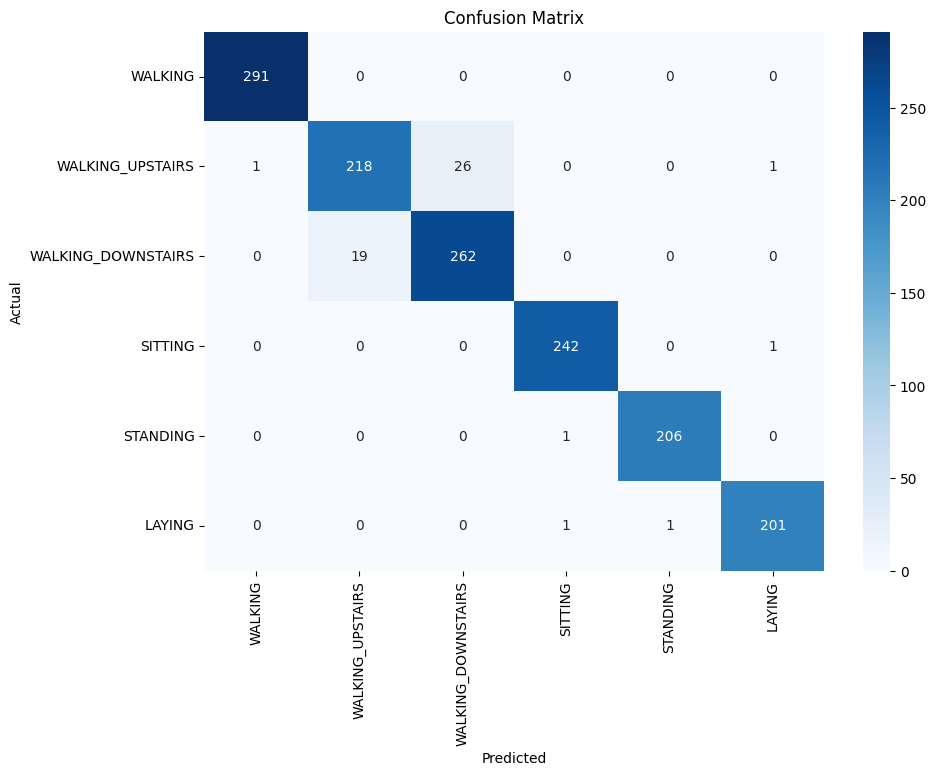

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       291
  WALKING_UPSTAIRS       0.92      0.89      0.90       246
WALKING_DOWNSTAIRS       0.91      0.93      0.92       281
           SITTING       0.99      1.00      0.99       243
          STANDING       1.00      1.00      1.00       207
            LAYING       0.99      0.99      0.99       203

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



In [16]:
# print accuracy
print("Accuracy of SVC classifier on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Accuracy of SVC classifier on train set: {:.2f}".format(accuracy_score(y_train, svc.predict(X_train))))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
activity_labels = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]


confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels, yticklabels=activity_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



# print classification report
print(classification_report(y_test, y_pred, target_names=activity_labels))